In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic = pd.read_csv("C:\\Datasets\\titanic\\train.csv")
titanic.head()
# titanic[titanic.isnull()].any()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Data preparation
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']
# y.shape

# y = titanic['Survived'].value_counts()
# y

# X['Parch'].unique()

(891,)

In [4]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, train_size = 0.8)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# preprocessing for numerical and categorical data
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']  #don't forget to add Pclass
# text_features = ['Name']



numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')), ('scaler',MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])
# text_transformer = Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words="english"))])

# applying the preprocessing strategies to each columns
preprocessor = ColumnTransformer(transformers=[('numerical',numerical_transformer,numerical_features), 
                                               ('categorical',categorical_transformer,categorical_features)])

# ,('text',text_transformer,text_features)

# # importing the model class for classification
from sklearn.ensemble import RandomForestClassifier

# Constructing the model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=1))])

# Fit the model on the data 
model_pipeline.fit(Xtrain, ytrain)

# predicting on the test data
y_pred = model_pipeline.predict(Xtest)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))


Accuracy: 0.7541899441340782

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       106
           1       0.78      0.55      0.65        73

    accuracy                           0.75       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.75      0.74       179



In [15]:
# using cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(model_pipeline, X, y, cv=5, scoring="accuracy").mean()

0.7946142740568702

In [16]:
# using leave_one_out cross validation
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_pipeline, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [18]:
# getting the mean of leave_one_out
scores.mean()

0.8047138047138047

In [26]:
# using cross validation score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model_pipeline, X, y, cv=5, scoring="accuracy").mean()
precision  = cross_val_score(model_pipeline, X, y, cv=5, scoring="precision").mean()
recall = cross_val_score(model_pipeline, X, y, cv=5, scoring="recall").mean()
f1 = cross_val_score(model_pipeline, X, y, cv=5, scoring="f1").mean()
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

accuracy: 0.7946142740568702
precision: 0.738656452492422
recall: 0.7190963341858482
f1: 0.7279377887388336


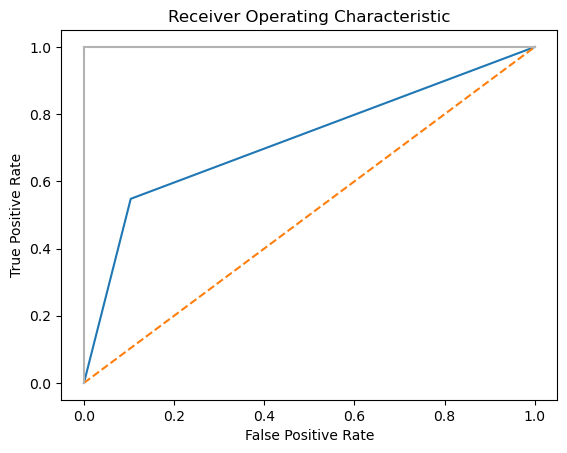

In [29]:
# for roc (receiver operating characteristic)
from sklearn.metrics import roc_curve

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(ytest, y_pred)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");
plt.show()